In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("C:/Users/patha/Downloads/rideshare_kaggle.csv")

In [4]:
df.dropna(axis = 0, inplace = True)
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [5]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_numeric = df[numeric_cols]

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numeric)

pca = PCA(n_components=40)
pca_df = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_df)

In [6]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,4.250572,2.337611,1.241928,0.691632,0.582285,2.322285,-2.067313,-2.618848,-0.325984,0.789120,...,-0.087545,-0.021262,-0.020030,0.067880,0.041498,0.022412,-0.010338,-0.001333,-0.007810,-0.001856
1,-6.035866,1.161779,4.821680,-1.759994,0.901835,1.463514,-1.500048,-2.021841,2.005597,0.786049,...,0.017192,0.019638,0.008228,-0.011297,-0.006551,-0.004409,-0.001671,-0.004525,0.000176,0.004398
2,-3.711734,-2.060587,-0.322583,0.180432,2.000880,0.675256,-1.697733,-2.845596,0.436642,0.773736,...,0.032695,0.006346,-0.000417,-0.002700,-0.005532,-0.003248,-0.004371,0.002952,0.006695,-0.000143
3,-2.049622,-2.858534,-1.255705,-0.771054,2.393263,1.021622,-0.306492,-2.402638,0.414025,0.734479,...,0.068318,-0.036385,-0.003710,-0.007223,0.021848,0.000232,-0.009429,-0.002109,-0.007363,-0.002550
4,-2.565964,-3.698104,0.127494,0.273182,2.084639,0.933597,-1.581177,-2.241277,-0.275702,0.752221,...,0.014979,-0.026694,-0.018628,0.010833,0.005700,0.019078,0.006731,0.003187,0.005208,0.001872


In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

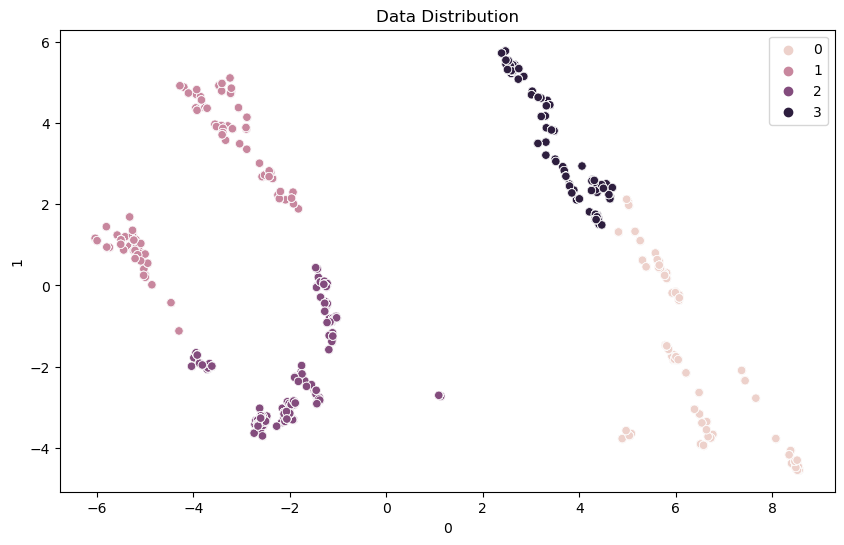

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)
KMeans (n_clusters=4)

np.random.seed(42)
preds = kmeans.predict(pca_df)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_df[0],y=pca_df[1],hue=preds)
plt.title('Data Distribution')
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='count'>

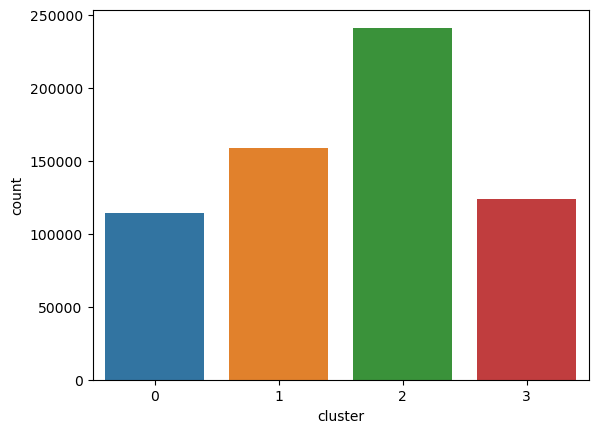

In [9]:
df['cluster'] = preds
sns.countplot(x = df['cluster'])


In [10]:
#profiling segments

In [ ]:
sns.set_palette('coolwarm')

for i in df.drop('cluster', axis=1):
    grid = sns.FacetGrid(df, height=4, col='cluster', sharex=False)
    grid = grid.map(sns.histplot, i, bins=10)
    plt.show()


In [ ]:
#remove sound
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

In [ ]:
model=dbscan.fit(Scaled_df)
labels=model.labels_

In [ ]:
from sklearn import metrics

sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

n_clusters=len(set(labels)) - (1 if -1 in labels else 0)
print (metrics.silhouette_score (Scaled_df,labels))